# PROBLEM STATEMENT


#### Q1. What does the primary analysis of several categorical features reveal? Q2. Perform the following Exploratory Data Analysis tasks: a. Missing Value Analysis b. Outlier Treatment using the Z-score method c. Deal with correlated variables Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### LOAD THE DATASET

In [2]:
df=pd.read_csv("credit_card.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
df.shape

(8950, 18)

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [10]:
df.describe(include="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [11]:
categorical_features = df.select_dtypes(include=[np.object]) #Finding categorical features in train dataset
categorical_features.columns

C:\Users\dell\AppData\Local\Temp/ipykernel_8308/1888521553.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]) #Finding categorical features in train dataset


Index(['CUST_ID'], dtype='object')

### HANDLING MISSING VALUES

In [12]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [14]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)

In [15]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
df = df.astype({ 'BALANCE':"int", 'BALANCE_FREQUENCY':"int", 'PURCHASES':"int",
       'ONEOFF_PURCHASES':"int", 'INSTALLMENTS_PURCHASES':"int", 'CASH_ADVANCE':"int",
       'PURCHASES_FREQUENCY':"int", 'ONEOFF_PURCHASES_FREQUENCY':"int",
       'PURCHASES_INSTALLMENTS_FREQUENCY':"int", 'CASH_ADVANCE_FREQUENCY':"int",'CREDIT_LIMIT':"int", 'PAYMENTS':"int",
       'MINIMUM_PAYMENTS':"int", 'PRC_FULL_PAYMENT':"int"})

In [17]:
df.dtypes

CUST_ID                             object
BALANCE                              int32
BALANCE_FREQUENCY                    int32
PURCHASES                            int32
ONEOFF_PURCHASES                     int32
INSTALLMENTS_PURCHASES               int32
CASH_ADVANCE                         int32
PURCHASES_FREQUENCY                  int32
ONEOFF_PURCHASES_FREQUENCY           int32
PURCHASES_INSTALLMENTS_FREQUENCY     int32
CASH_ADVANCE_FREQUENCY               int32
CASH_ADVANCE_TRX                     int64
PURCHASES_TRX                        int64
CREDIT_LIMIT                         int32
PAYMENTS                             int32
MINIMUM_PAYMENTS                     int32
PRC_FULL_PAYMENT                     int32
TENURE                               int64
dtype: object

In [18]:
df.drop("CUST_ID",axis=1,inplace=True)

In [19]:
df.dtypes

BALANCE                             int32
BALANCE_FREQUENCY                   int32
PURCHASES                           int32
ONEOFF_PURCHASES                    int32
INSTALLMENTS_PURCHASES              int32
CASH_ADVANCE                        int32
PURCHASES_FREQUENCY                 int32
ONEOFF_PURCHASES_FREQUENCY          int32
PURCHASES_INSTALLMENTS_FREQUENCY    int32
CASH_ADVANCE_FREQUENCY              int32
CASH_ADVANCE_TRX                    int64
PURCHASES_TRX                       int64
CREDIT_LIMIT                        int32
PAYMENTS                            int32
MINIMUM_PAYMENTS                    int32
PRC_FULL_PAYMENT                    int32
TENURE                              int64
dtype: object

In [20]:
df.columns
col=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

### OUTLIERS

In [21]:
def zscore_outliers(data_1):
    outliers=[]    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [22]:
for i in col:
    print('No. of outliers ', i, '=', zscore_outliers(df[i]))

No. of outliers  BALANCE = [12136, 8181, 9381, 8504, 14224, 11167, 9354, 19043, 10598, 13673, 11972, 8350, 9047, 9612, 7938, 8097, 9261, 9206, 8939, 8806, 11278, 12474, 7957, 11209, 9335, 8647, 9601, 10249, 12478, 13479, 15258, 11547, 8997, 9149, 9559, 7975, 15244, 8781, 8900, 14411, 10359, 13763, 7811, 13774, 10397, 9470, 8646, 9164, 8220, 11083, 10131, 9901, 11654, 14581, 9255, 12358, 12373, 8823, 8115, 8884, 9387, 7994, 7886, 9680, 8787, 8625, 8151, 11431, 8281, 8767, 8809, 8159, 8953, 7919, 11670, 10822, 9502, 11734, 7888, 9303, 8099, 11955, 9264, 9459, 8435, 9355, 8084, 7842, 8636, 10599, 10905, 9226, 7820, 8356, 15532, 7985, 11964, 12856, 8771, 10915, 11416, 11077, 8559, 9226, 8073, 8198, 11930, 11642, 8214, 9266, 12323, 8030, 8791, 7857, 9753, 9629, 8897, 11631, 9342, 10871, 8571, 8341, 8161, 9111, 10092, 9993, 10124, 8700, 9630, 9598, 7899, 14100, 8539, 9061, 8983, 8260, 8121, 8695, 13968, 10116, 9440, 18495, 8043, 8477, 8040, 12596, 9061, 10571, 9699, 11206, 9919, 9962, 8315, 

In [23]:
# Dealing with Outliers:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

df=cap_data(df)

capping the  BALANCE
capping the  BALANCE_FREQUENCY
capping the  PURCHASES
capping the  ONEOFF_PURCHASES
capping the  INSTALLMENTS_PURCHASES
capping the  CASH_ADVANCE
capping the  PURCHASES_FREQUENCY
capping the  ONEOFF_PURCHASES_FREQUENCY
capping the  PURCHASES_INSTALLMENTS_FREQUENCY
capping the  CASH_ADVANCE_FREQUENCY
capping the  CASH_ADVANCE_TRX
capping the  PURCHASES_TRX
capping the  CREDIT_LIMIT
capping the  PAYMENTS
capping the  MINIMUM_PAYMENTS
capping the  PRC_FULL_PAYMENT
capping the  TENURE


C:\Users\dell\AppData\Local\Temp/ipykernel_8308/1692076479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\dell\AppData\Local\Temp/ipykernel_8308/1692076479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
C:\Users\dell\AppData\Local\Temp/ipykernel_8308/1692076479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

### Deal with correlated variables

<AxesSubplot:>

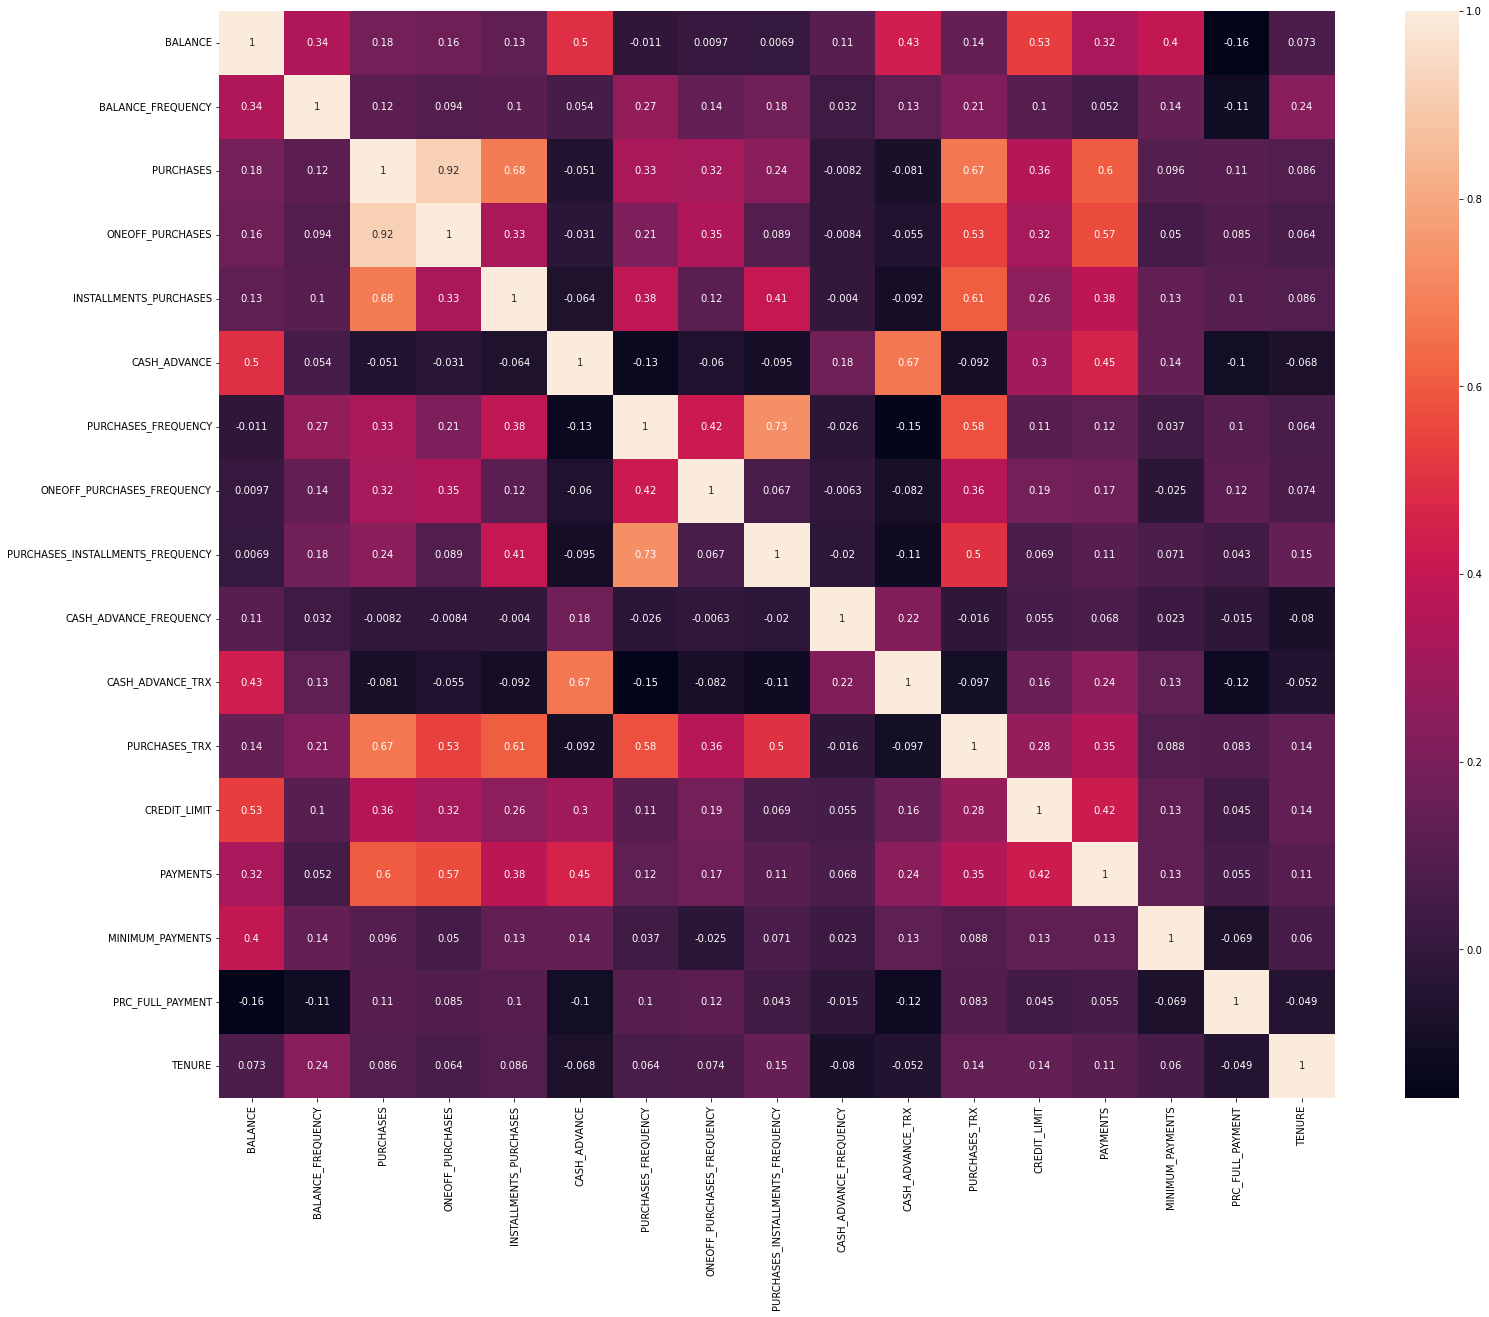

In [24]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)

In [25]:
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [26]:
high_corr_var

[('PURCHASES', 'ONEOFF_PURCHASES')]

In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732187,-1.505861,-0.424944,-0.356826,-0.349292,-0.466697,-0.567114,-0.238318,-0.417965,-0.060834,-0.557505,-0.579714,-0.960378,-0.529088,-0.302407,-0.240145,0.360680
1,0.786974,-1.505861,-0.469410,-0.356826,-0.454357,2.605417,-0.567114,-0.238318,-0.417965,-0.060834,0.166685,-0.675130,0.688679,0.818803,0.097565,-0.240145,0.360680
2,0.447300,0.664072,-0.107595,0.108919,-0.454357,-0.466697,1.763314,4.196078,-0.417965,-0.060834,-0.557505,-0.102638,0.826100,-0.383660,-0.093204,-0.240145,0.360680
3,0.049013,-1.505861,0.232220,0.546346,-0.454357,-0.368935,-0.567114,-0.238318,-0.417965,-0.060834,-0.376457,-0.627422,0.826100,-0.598521,-0.228243,-0.240145,0.360680
4,-0.358883,0.664072,-0.461921,-0.347186,-0.454357,-0.466697,-0.567114,-0.238318,-0.417965,-0.060834,-0.557505,-0.627422,-0.905410,-0.364315,-0.257394,-0.240145,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737952,0.664072,-0.333203,-0.356826,-0.132524,-0.466697,1.763314,-0.238318,-0.417965,-0.060834,-0.557505,-0.388884,-0.960378,-0.486254,-0.341418,-0.240145,-4.122768
8946,-0.742276,0.664072,-0.328991,-0.356826,-0.122571,-0.466697,1.763314,-0.238318,-0.417965,-0.060834,-0.557505,-0.388884,-0.960378,-0.503526,-0.228243,-0.240145,-4.122768
8947,-0.740354,-1.505861,-0.402009,-0.356826,-0.295100,-0.466697,-0.567114,-0.238318,-0.417965,-0.060834,-0.557505,-0.436591,-0.960378,-0.570540,-0.326843,-0.240145,-4.122768
8948,-0.745159,-1.505861,-0.469410,-0.356826,-0.454357,-0.449529,-0.567114,-0.238318,-0.417965,-0.060834,-0.195410,-0.675130,-1.097800,-0.580558,-0.338417,-0.240145,-4.122768


### principal component analysis

In [28]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.767248,-0.923621,0.730383,-0.192482,0.403390,0.175595,-0.384974,0.160997,-0.336711,0.905539,0.162180,-0.220308,-0.233310,-0.384666,-0.074860,0.077042,-0.000125
1,-0.539445,2.406498,0.736806,0.311878,0.269413,-0.969473,-0.923915,-0.467427,-0.919990,1.042639,-0.236720,0.548770,-0.801581,-0.268533,-0.894070,0.004766,0.000024
2,1.345854,-0.884248,-0.679603,-0.372030,-3.571395,-0.133262,1.490596,-0.988877,-1.349456,0.867863,0.716492,0.616571,0.393728,-0.705061,0.032228,0.210140,0.000389
3,-0.637817,-0.058360,1.194624,-0.672221,0.221008,-0.134889,-0.174956,0.170904,-1.315566,0.214751,-0.379732,-0.785136,0.335595,-0.347109,-0.386473,0.041079,0.000075
4,-1.374738,-0.500695,-0.259267,-0.763336,-0.283516,0.451061,-0.076632,0.334963,0.569116,-0.166488,-0.086038,0.435741,-0.139498,-0.138301,0.046741,-0.116879,-0.000122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.027093,-1.279197,-0.010726,2.311631,0.325622,1.200357,1.973425,-2.081608,0.487933,-1.635149,-0.498240,1.123694,0.401719,0.274587,0.025397,1.061350,0.000435
8946,-1.016655,-1.264717,-0.038610,2.288278,0.371665,1.189036,2.048044,-2.070214,0.495854,-1.586425,-0.493583,1.121271,0.419995,0.297277,0.007303,1.057536,0.000436
8947,-2.141166,-0.887079,1.741854,2.103633,1.229570,0.967899,1.728566,-1.865775,-0.353223,-0.797613,-0.094311,0.300910,-0.135143,0.053982,0.349720,-0.353443,-0.000308
8948,-2.352067,-0.695886,1.699248,2.195277,1.123484,0.983649,1.681040,-1.927783,-0.160717,-0.694951,-0.136067,0.159128,0.071341,-0.051099,0.419686,-0.331416,-0.000257


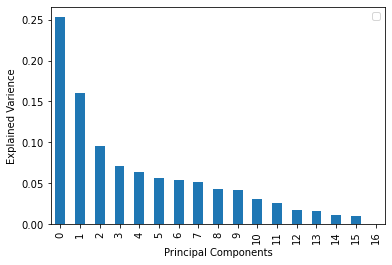

In [29]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

### Build a model with multiple k

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[2,5,6,7,8]
for k in n_clusters:
          cluster=KMeans(n_clusters=k,random_state=10)
          predict=cluster.fit_predict(df)
          score=silhouette_score(df,predict,random_state=10)
          print("(for n_clusters={},silhouette_score  is {})".format(k,score))

(for n_clusters=2,silhouette_score  is 0.5117834762244394)
(for n_clusters=5,silhouette_score  is 0.4074040842747333)
(for n_clusters=6,silhouette_score  is 0.3724627233723239)
(for n_clusters=7,silhouette_score  is 0.3699269116899274)
(for n_clusters=8,silhouette_score  is 0.382312113841886)


### Elbow method

In [31]:
from sklearn.cluster import KMeans

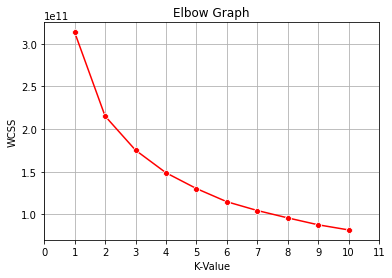

In [32]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="red", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()    

In [33]:
model = KMeans(n_clusters= 2, random_state= 10)

# fit the model
model.fit(df)

KMeans(n_clusters=2, random_state=10)

In [41]:
data_output = df.copy(deep = True)
# add a column 'Cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

# head() to display top five rows
data_output.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40,0,95,0,95,0,0,0,0,0,0,2.0,1000,201,139,0,12,0
1,3202,0,0,0,0,6442,0,0,0,0,4,0.0,7000,4103,1072,0,12,1
2,2495,1,773,773,0,0,1,1,0,0,0,12.0,7500,622,627,0,12,1
3,1666,0,1499,1499,0,205,0,0,0,0,1,1.0,7500,0,312,0,12,1
4,817,1,16,16,0,0,0,0,0,0,0,1.0,1200,678,244,0,12,0


In [42]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([6442, 2319,  133,   56], dtype=int64))

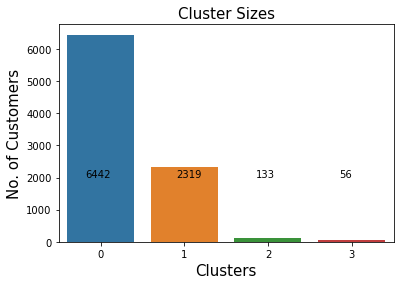

In [43]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data_output, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.18, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.85, y =2000, s = np.unique(model.labels_, return_counts=True)[1][3])

plt.show()

# Part II: Deep Learning

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        
import seaborn as sns                                  
from sklearn.metrics import log_loss                   
from sklearn.model_selection import RepeatedKFold    

In [35]:
data = pd.read_csv("Sentiment.csv")
data.head() 

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [36]:
data.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [37]:
data.isnull().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [39]:
data.shape

(13871, 21)

In [1]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20)) #The embedding layer
model1.add(layers.LSTM(15,dropout=0.5)) #Our LSTM layer
model1.add(layers.Dense(3,activation='softmax'))


model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint1])

ModuleNotFoundError: No module named 'tensorflow'

In [45]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow